# Quick start

A simple example of simulating a population via the built-in populations provided.

In [1]:
%matplotlib notebook


import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(context='notebook', fscale=1, grid=False)
green = "#1DEBA6"
red = "#FF0059"
yellow = "#F6EF5B"


import popsynth
import networkx as nx

import warnings
warnings.simplefilter('ignore')

/Users/jburgess/.environs/popsynth/lib/python3.7/site-packages/popsynth-0.3.3+1.g31c9fe7.dirty-py3.7.egg/popsynth/distribution.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


## A spherically homogenous population with a pareto luminosity function

**popsynth** comes with several types of populations preloaded. To create a population synthesizer, one simply instantiates the population form the **popsynth.populations** module.

In [2]:
homo_pareto_synth = popsynth.populations.ParetoHomogeneousSphericalPopulation(Lambda=0.25, # the density normalization
                                                                              Lmin=1, # lower bound on the LF
                                                                              alpha=2.) # index of the LF
homo_pareto_synth.display()


# we can also display a graph of the object


options = {
'node_color':green,
'node_size': 2000,
'width': .5}

#pos = nx.spring_layout(g,k=5, iterations=300)


## Luminosity Function

<IPython.core.display.Math object>

,parameter,value
0,Lmin,1.0
1,alpha,2.0


## Spatial Function

<IPython.core.display.Math object>

,parameter,value
0,Lambda,0.25


In [3]:
pos=nx.drawing.nx_agraph.graphviz_layout(
        homo_pareto_synth.graph, prog='dot'
    )
    
nx.draw(homo_pareto_synth.graph, with_labels=True,pos=pos, **options)



ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

## Creating a survey

We can now sample from this population with the **draw_survey** function.

In [4]:
population = homo_pareto_synth.draw_survey(boundary=1E-2, hard_cut=True, flux_sigma= 0.1,verbose=True)

The volume integral is 130.899694



Expecting 119 total objects
Applying hard boundary
Deteced 55 objects or to a distance of 4.96


We now have created a population. How did we get here?

* Once the spatial and luminosity functions are specified, we can integrate out to a given distance and compute the number of expected objects.

* A Poisson draw with this mean is made to determine the number of total objects in the survey.

* Next all quantities are sampled (distance, luminosity)

* If needed, the luminosity is converted to a flux with a given observational error

* The selection function (in this case a hard cutoff) is applied

* A population object is created

We could have specified a soft cutoff (an inverse logit) with logarithmic with as well:

In [5]:
population = homo_pareto_synth.draw_survey(boundary=1E-2, strength=10, flux_sigma= 0.1,verbose=True)

The volume integral is 130.899694



Expecting 119 total objects
Applying soft boundary



Deteced 54 objects or to a distance of 4.96


## The Population Object

The population object stores all the information about the sampled survey. This includes information on the latent parameters, measured parameters, and distances for both the selected and non-selected objects.

We can have a look at the flux-distance distribution from the survey. Here, pink dots are the *latent* flux value, i.e., without observational noise, and green dots are the *measured values for the *selected* objects. Arrows point from the latent to measured values. 

<IPython.core.display.Javascript object>


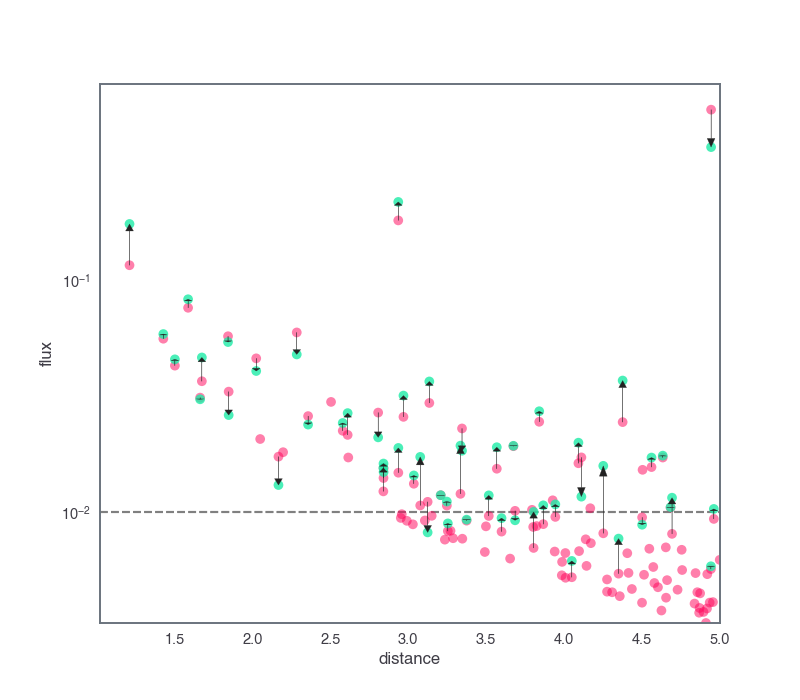

In [6]:
population.display_fluxes(obs_color=green, true_color=red);

For fun, we can display the fluxes on in a simulated universe in 3D

In [7]:
population.display_obs_fluxes_sphere()

ToggleButton(value=False, description='Rotate')

The population object stores a lot of information. For example, an array of selection booleans:

In [ ]:
population.selection

We can retrieve selected and non-selected distances:

In [ ]:
population.selected_distances

In [ ]:
population.hidden_distances

## Saving the population
We can record the results of a population synth to an HDF5 file that maintains all the information from the run. The true values of the population parameters are always stored in the truth dictionary:


In [ ]:
population.truth

In [ ]:
population.writeto('saved_pop.h5')

In [ ]:
reloaded_population = popsynth.Population.from_file('saved_pop.h5')

In [ ]:
reloaded_population.truth